In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Load the data
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Skip comment and description lines
            if line.startswith('%') or line.strip() == '' or 'X Height' in line:
                continue
            parts = line.split()
            if len(parts) == 2:
                try:
                    k = float(parts[0])
                    freq = float(parts[1])
                    data.append((k, freq))
                except ValueError:
                    continue
    return np.array(data)

In [ ]:
h18 = load_data('h_Air18.txt')
h20 = load_data('h_Air20.txt')
h22 = load_data('h_Air22.txt')
h24 = load_data('h_Air24.txt')
h26 = load_data('h_Air26.txt')
h28 = load_data('h_Air28.txt')
h30 = load_data('h_Air30.txt')
h50 = load_data('h_Air50.txt')

In [ ]:
#plt.figure(figsize=(10, 6))
#plt.scatter(h18[:, 0], h18[:, 1], label='h18')
#plt.scatter(h20[:, 0], h20[:, 1], label='h20')
#plt.scatter(h22[:, 0], h22[:, 1], label='h22')
#plt.scatter(h24[:, 0], h24[:, 1], label='h24')
#plt.scatter(h26[:, 0], h26[:, 1], label='h26')
#plt.scatter(h28[:, 0], h28[:, 1], label='h28')
#plt.scatter(h30[:, 0], h30[:, 1], label='h30')
#plt.legend()

In [4]:
hBand = np.array([20, 22, 24, 26, 28, 30])
BandGap = np.array([0.004200, 0.003015, 0.002188, 0.001511, 0.001079, 0.000799])

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(hBand, np.log(BandGap))
r_squared = r_value**2

print(f"Linear equation: y = {slope:.6f}x + {intercept:.6f}")
print(f"R-squared value: {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Standard error: {std_err:.6f}")

Linear equation: y = -0.167862x + -2.113537
R-squared value: 0.9994
p-value: 0.0000
Standard error: 0.002094


In [6]:
regression_line = slope * hBand + intercept
regression_line

array([-5.470767  , -5.80649003, -6.14221305, -6.47793608, -6.81365911,
       -7.14938213])

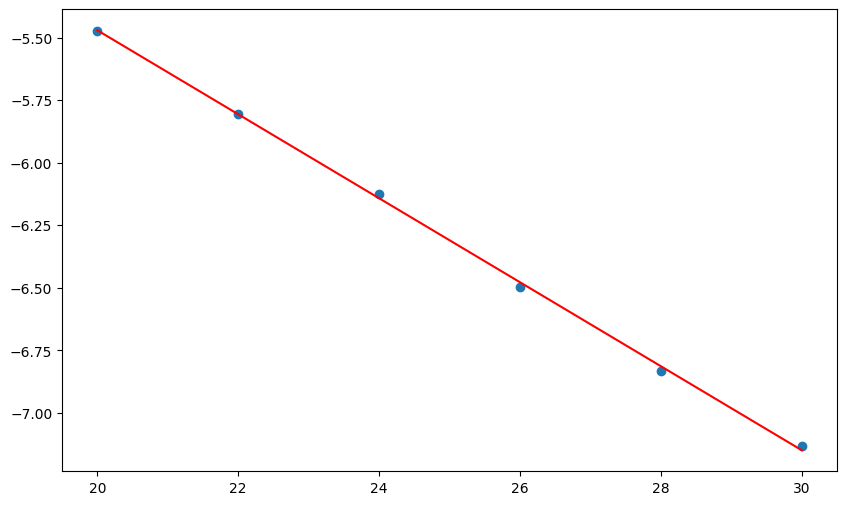

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(hBand, np.log(BandGap))
plt.plot(hBand, regression_line, color='red')

In [9]:
hGamma = np.array([18, 20, 22, 24, 26, 28])
gamma_1 = np.array([0.031652, 0.0151760, 0.008185, 0.004984, 0.003394, 0.002490])/2
gamma_1

array([0.015826 , 0.007588 , 0.0040925, 0.002492 , 0.001697 , 0.001245 ])

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(hGamma, np.log(gamma_1))
r_squared = r_value**2

print(f"Linear equation: y = {slope:.6f}x + {intercept:.6f}")
print(f"R-squared value: {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Standard error: {std_err:.6f}")

Linear equation: y = -0.252883x + 0.218288
R-squared value: 0.9756
p-value: 0.0002
Standard error: 0.019985


In [11]:
regression_line = slope * hGamma + intercept
regression_line

array([-4.33359874, -4.83936393, -5.34512912, -5.85089432, -6.35665951,
       -6.8624247 ])

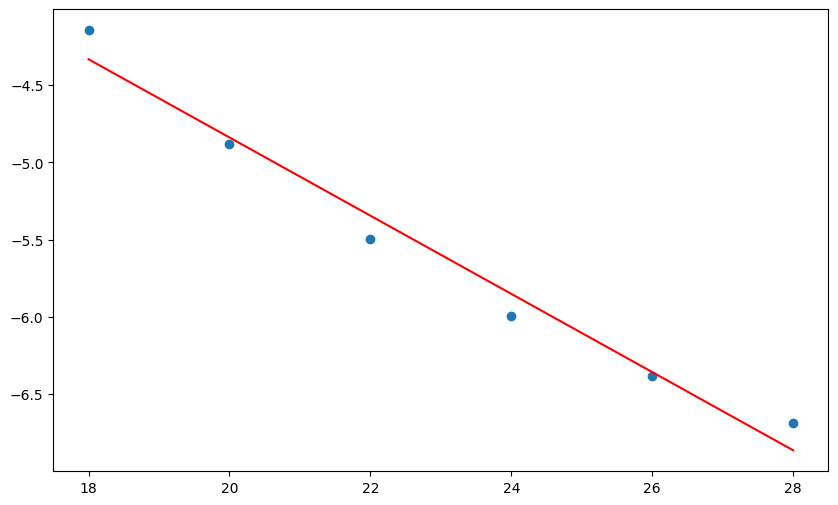

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(hGamma, np.log(gamma_1))
plt.plot(hGamma, regression_line, color='red')